In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import glob
import re
import os
from specutils import Spectrum1D
import spectres
from specutils.manipulation import FluxConservingResampler
from astropy import units as u

In [2]:
MOCA_data = pd.read_csv("MOCAtoSphereXdata.csv")

In [3]:
model_path = r"\\wsl.localhost\Ubuntu\home\ashto\ultracooldwarfs\BT-SettleTeff1000-9000logg4-5\models_1762208956\bt-settl"
model_files = glob.glob(os.path.join(model_path, "*.dat.txt"))

In [4]:
models_data = []
for file in model_files:
    data = np.loadtxt(file, comments="#")
    models_data.append(data)

In [5]:
all_models = []  

for file in model_files:
    data = np.loadtxt(file, comments="#")
    wavelength = data[:, 0] / 1e4   # from angstrom to micron
    flux = data[:, 1] * 1e4         # per angstrom to per micron
    filename = os.path.basename(file)

    match = re.search(r"lte(\d+)-([\d.]+)", filename, re.IGNORECASE)
    if match:
        teff = float(match.group(1)) * 100  
        logg = float(match.group(2))
    else:
        print("No match for:", filename)
        teff = logg = np.nan

    model_entry = {
        "filename": filename,
        "teff": teff,
        "logg": logg,
        "meta": 0.0,
        "alpha": 0.0,
        "wavelength": wavelength,
        "flux": flux,
    }

    all_models.append(model_entry)

In [6]:
dusty_path = r'\\wsl.localhost\Ubuntu\home\ashto\ultracooldwarfs\AMES-DustyTeff500-3900logg35-6\dusty00'
dusty_files = glob.glob(os.path.join(dusty_path, "*.dat.txt"))
dusty_data = []
for file in dusty_files:
    data = np.loadtxt(file, comments="#")
    dusty_data.append(data)

In [7]:
all_models_dusty = []  

for file in dusty_files:
    data = np.loadtxt(file, comments="#")
    wavelength = data[:, 0] / 1e4   # from angstrom to micron
    flux = data[:, 1] * 1e4         # per angstrom to per micron
    filename = os.path.basename(file)

    match = re.search(r"lte(\d+)-([0-9.]+)-([0-9.\-]+)", filename, re.IGNORECASE)
    if match:
        teff = float(match.group(1)) * 100  
        logg = float(match.group(2))
    else:
        print("No match for:", filename)
        teff = logg = np.nan

    model_entry = {
        "filename": filename,
        "teff": teff,
        "logg": logg,
        "meta": 0.0,
        "alpha": 0.0,
        "wavelength": wavelength,
        "flux": flux,
    }

    all_models_dusty.append(model_entry)

In [8]:
all_models_dusty

[{'filename': 'lte28-4.0-0.0.AMES-dusty.7.dat.txt',
  'teff': 2800.0,
  'logg': 4.0,
  'meta': 0.0,
  'alpha': 0.0,
  'wavelength': array([2.64840000e-03, 3.79580000e-03, 5.12470000e-03, ...,
         8.70761831e+02, 9.20748159e+02, 9.70734486e+02]),
  'flux': array([1.2561e-93, 1.2561e-93, 1.2561e-93, ..., 9.9750e-02, 7.9524e-02,
         6.4165e-02])},
 {'filename': 'lte10-3.5-0.0.AMES-dusty.7.dat.txt',
  'teff': 1000.0,
  'logg': 3.5,
  'meta': 0.0,
  'alpha': 0.0,
  'wavelength': array([2.64840000e-03, 3.79580000e-03, 5.12470000e-03, ...,
         8.70761831e+02, 9.20748159e+02, 9.70734486e+02]),
  'flux': array([1.2561e-93, 1.2561e-93, 1.2561e-93, ..., 6.9502e-02, 5.5386e-02,
         4.4689e-02])},
 {'filename': 'lte24-4.5-0.0.AMES-dusty.7.dat.txt',
  'teff': 2400.0,
  'logg': 4.5,
  'meta': 0.0,
  'alpha': 0.0,
  'wavelength': array([0.00000000e+00, 1.00000000e-07, 2.00000000e-07, ...,
         8.59764839e+02, 9.09751166e+02, 9.59737494e+02]),
  'flux': array([1.2561e-93, 1.2561

In [9]:
all_models

[{'filename': 'lte053-4.5-0.0a+0.0.BT-NextGen.7.dat.txt',
  'teff': 5300.0,
  'logg': 4.5,
  'meta': 0.0,
  'alpha': 0.0,
  'wavelength': array([0.00000000e+00, 1.00000000e-07, 2.00000000e-07, ...,
         9.98226967e+02, 9.98726830e+02, 9.99226693e+02]),
  'flux': array([3.54814e-95, 3.54814e-95, 3.54814e-95, ..., 9.57412e-02,
         9.55431e-02, 9.53457e-02])},
 {'filename': 'lte046-4.5-0.0a+0.0.BT-NextGen.7.dat.txt',
  'teff': 4600.0,
  'logg': 4.5,
  'meta': 0.0,
  'alpha': 0.0,
  'wavelength': array([0.00000000e+00, 1.00000000e-07, 2.00000000e-07, ...,
         9.98226967e+02, 9.98726830e+02, 9.99226693e+02]),
  'flux': array([4.65586e-95, 4.65586e-95, 4.65586e-95, ..., 8.41587e-02,
         8.39845e-02, 8.38110e-02])},
 {'filename': 'lte022-5.0-0.0.BT-Settl.7.dat.txt',
  'teff': 2200.0,
  'logg': 5.0,
  'meta': 0.0,
  'alpha': 0.0,
  'wavelength': array([0.00000000e+00, 1.00000000e-07, 2.00000000e-07, ...,
         9.98226967e+02, 9.98726830e+02, 9.99226693e+02]),
  'flux': ar

In [10]:
def rebin_model_to_obs(model_wave, model_flux, obs_wave):
    spec_model = Spectrum1D(
        spectral_axis=model_wave * u.micron,
        flux=model_flux * (u.erg / u.s / u.cm**2 / u.micron)
    )
    obs_axis = obs_wave * u.micron
    resampler = FluxConservingResampler()
    rebinned = resampler(spec_model, obs_axis)

    return rebinned.flux.value

def compute_chi2(obs_wave, obs_flux, obs_err, model_wave, model_flux):
    # Interpolate model onto observed wavelength grid
    interp_flux = rebin_model_to_obs(model_wave, model_flux, obs_wave)

    # scaling factor a
    num = np.sum(obs_flux)
    denom = np.sum(interp_flux)
    a = num / denom

    chi2 = np.sum(((obs_flux - a * interp_flux)**2) / obs_err**2)
    dof = len(obs_wave) - 1  # degrees of freedom
    red_chi2 = chi2 / dof
    return chi2, red_chi2, a



In [11]:
all_models = all_models + all_models_dusty

In [12]:
results = []

for _, row in MOCA_data.iterrows():
    designation = row["designation"]

    obs_wave = np.fromstring(row["wavelength"][1:-1], sep=' ')
    obs_flux = np.fromstring(row["flux"][1:-1], sep=' ')
    obs_err  = np.fromstring(row["flux_err"][1:-1], sep=' ')

    best_fit = None
    best_chi2 = np.inf

    for model in all_models:
        chi2, red_chi2, a = compute_chi2(
            obs_wave, obs_flux, obs_err,
            model["wavelength"], model["flux"]
        )

        if red_chi2 < best_chi2:
            best_chi2 = red_chi2
            best_fit = {
                "designation": designation,
                "best_teff": model["teff"],
                "best_logg": model["logg"],
                "chi2": chi2,
                "red_chi2": red_chi2,
                "scale": a,
                "model_filename": model["filename"]
            }

    if best_fit is None:
        best_fit = {
            "designation": designation,
            "best_teff": np.nan,
            "best_logg": np.nan,
            "chi2": np.nan,
            "red_chi2": np.nan,
            "scale": np.nan,
            "model_filename": None
        }

    results.append(best_fit)


        Use Spectrum instead. [warnings]


In [13]:
results[0]

{'designation': '2MASS J12345629-4538075',
 'best_teff': 1700.0,
 'best_logg': 5.0,
 'chi2': np.float64(2091072.69971491),
 'red_chi2': np.float64(17000.591054592765),
 'scale': np.float64(0.002394927790317632),
 'model_filename': 'lte017-5.0-0.0.BT-Settl.7.dat.txt'}

In [14]:
best_teff_dict = {d['designation']: d['best_teff'] for d in results}
MOCA_data['Settle_Teff'] = MOCA_data['designation'].map(best_teff_dict)


In [15]:
# MOCA_data 
# = MOCA_data.dropna(subset=['Teff])

In [16]:
# models_1700 = [m for m in all_models if m['teff'] == 1700]

# plt.figure(figsize=(10,6))
# obj = MOCA_data.iloc[1]

# obs_wave = np.fromstring(obj['wavelength'][1:-1], sep=' ')
# obs_flux = np.fromstring(obj['flux'][1:-1], sep=' ')
# obs_err  = np.fromstring(obj['flux_err'][1:-1], sep=' ')

# plt.figure(figsize=(10,6))
# plt.errorbar(obs_wave, obs_flux * 900, label=obj['designation'])
# for model in models_1700:
#     plt.plot(model['wavelength'], model['flux'], label=model['filename'])

# plt.xlabel("Wavelength")
# plt.ylabel("Flux")
# plt.title("Spectra for Models with Teff = 1700 K")
# plt.legend()
# plt.xlim(0,5)

In [17]:
# plt.plot(models_1700[0]['wavelength'], models_1700[0]['flux'])
# plt.errorbar(obs_wave, obs_flux * 900, label=obj['designation'])
# plt.xlim(0,5)

In [18]:
# plt.plot(models_1700[1]['wavelength'], models_1700[1]['flux'])
# plt.errorbar(obs_wave, obs_flux * 900, label=obj['designation'])
# plt.xlim(0,5)

In [19]:
# plt.plot(models_1700[2]['wavelength'], models_1700[2]['flux'])
# plt.errorbar(obs_wave, obs_flux * 900, label=obj['designation'])
# plt.xlim(0,5)

In [20]:
# plt.figure(figsize=(10, 6))

# for _, obj in MOCA_data.iterrows():
#     obs_wave = np.fromstring(obj['wavelength'][1:-1], sep=' ')
#     obs_flux = np.fromstring(obj['flux'][1:-1], sep=' ')
#     plt.errorbar(obs_wave, obs_flux, label=obj['designation'])

# plt.xlabel("Wavelength")
# plt.ylabel("Flux")
# plt.title("All MOCA Spectra")
# plt.show()


In [21]:
len(MOCA_data)

48

Scale factor =  0.0017131093683944122


        Use Spectrum instead. [warnings]


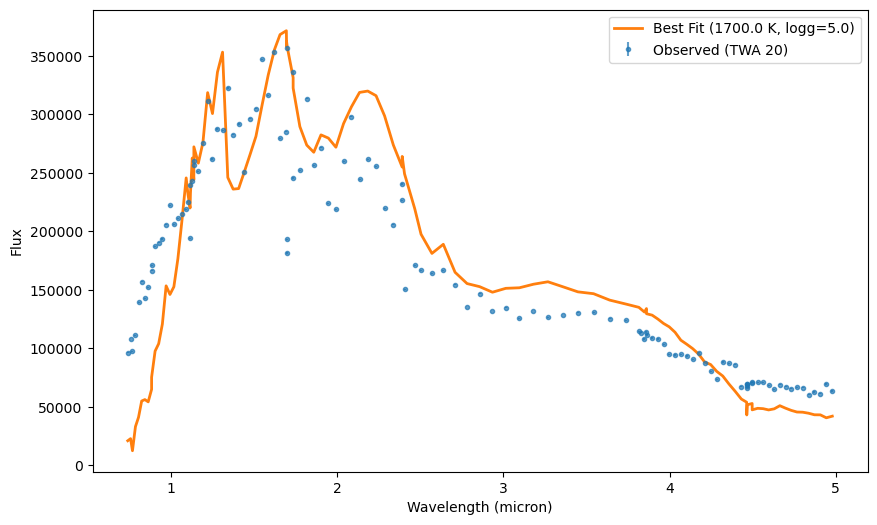

In [22]:
i = 2
obj = MOCA_data.iloc[i]
designation = obj["designation"]

obs_wave = np.fromstring(obj['wavelength'][1:-1], sep=' ')
obs_flux = np.fromstring(obj['flux'][1:-1], sep=' ')
obs_err  = np.fromstring(obj['flux_err'][1:-1], sep=' ')

#get best fit
best = [r for r in results if r["designation"] == designation][0]
model = [m for m in all_models if m["filename"] == best["model_filename"]][0]
model_wave = model["wavelength"]
model_flux = model["flux"]

#rebin
interp_flux = rebin_model_to_obs(model_wave, model_flux, obs_wave)
a = best["scale"]
scaled_model = a * interp_flux

plt.figure(figsize=(10,6))
plt.errorbar(obs_wave, obs_flux, yerr=obs_err, label=f"Observed ({designation})", fmt='.', alpha=0.7)
plt.plot(obs_wave, scaled_model, label=f"Best Fit ({best['best_teff']} K, logg={best['best_logg']})", linewidth=2)

plt.xlabel("Wavelength (micron)")
plt.ylabel("Flux")
plt.legend()
print("Scale factor = ",best['scale'])

In [23]:
junk = [4, 13, 14, 16,18, 27,30,  33, 39, 42,45,  ]
maybejunk = [1, 5,10,11, 19,20, 22, 25,26, 28,  34, 36,  ]

In [24]:
for idx in junk:
    r = results[idx]
    print(f"Index {idx}:  Teff = {r['best_teff']},  logg = {r['best_logg']}")
for idx in maybejunk:
    r = results[idx]
    print(f"Index {idx}:  Teff = {r['best_teff']},  logg = {r['best_logg']}")

Index 4:  Teff = 2600.0,  logg = 4.0
Index 13:  Teff = 1600.0,  logg = 4.5
Index 14:  Teff = 1700.0,  logg = 4.5
Index 16:  Teff = 3000.0,  logg = 4.0
Index 18:  Teff = 4300.0,  logg = 5.0
Index 27:  Teff = 1700.0,  logg = 5.0
Index 30:  Teff = 3000.0,  logg = 4.0
Index 33:  Teff = 500.0,  logg = 4.0
Index 39:  Teff = 1200.0,  logg = 6.0
Index 42:  Teff = 1700.0,  logg = 5.0
Index 45:  Teff = 1800.0,  logg = 5.5
Index 1:  Teff = 1700.0,  logg = 5.0
Index 5:  Teff = 1700.0,  logg = 4.5
Index 10:  Teff = 1700.0,  logg = 5.0
Index 11:  Teff = 1700.0,  logg = 5.0
Index 19:  Teff = 1600.0,  logg = 4.5
Index 20:  Teff = 1700.0,  logg = 6.0
Index 22:  Teff = 1700.0,  logg = 5.0
Index 25:  Teff = 1700.0,  logg = 6.0
Index 26:  Teff = 1700.0,  logg = 5.0
Index 28:  Teff = 1700.0,  logg = 5.0
Index 34:  Teff = 3600.0,  logg = 4.0
Index 36:  Teff = 1700.0,  logg = 5.0


In [25]:
all_indices = set(range(len(MOCA_data)))
bad_indices = set(junk) | set(maybejunk)
good_indices = sorted(all_indices - bad_indices)


In [26]:
len(good_indices)

25

In [27]:
for idx in good_indices:
    r = results[idx]
    if np.isnan(r['best_teff']) or np.isnan(r['best_logg']):
        continue

    print(f"Index {idx}:  Teff = {r['best_teff']},  logg = {r['best_logg']}")

Index 0:  Teff = 1700.0,  logg = 5.0
Index 2:  Teff = 1700.0,  logg = 5.0
Index 3:  Teff = 1700.0,  logg = 4.5
Index 6:  Teff = 1700.0,  logg = 4.5
Index 7:  Teff = 1700.0,  logg = 5.0
Index 8:  Teff = 1700.0,  logg = 5.0
Index 9:  Teff = 1700.0,  logg = 5.0
Index 12:  Teff = 1700.0,  logg = 5.0
Index 15:  Teff = 1800.0,  logg = 6.0
Index 17:  Teff = 1700.0,  logg = 5.0
Index 21:  Teff = 1700.0,  logg = 5.0
Index 24:  Teff = 1700.0,  logg = 5.0
Index 29:  Teff = 1700.0,  logg = 5.0
Index 31:  Teff = 1700.0,  logg = 5.0
Index 32:  Teff = 1700.0,  logg = 5.0
Index 38:  Teff = 1700.0,  logg = 5.0
Index 40:  Teff = 1700.0,  logg = 5.0
Index 43:  Teff = 1700.0,  logg = 5.0
Index 47:  Teff = 1700.0,  logg = 5.0


        Use Spectrum instead. [warnings]


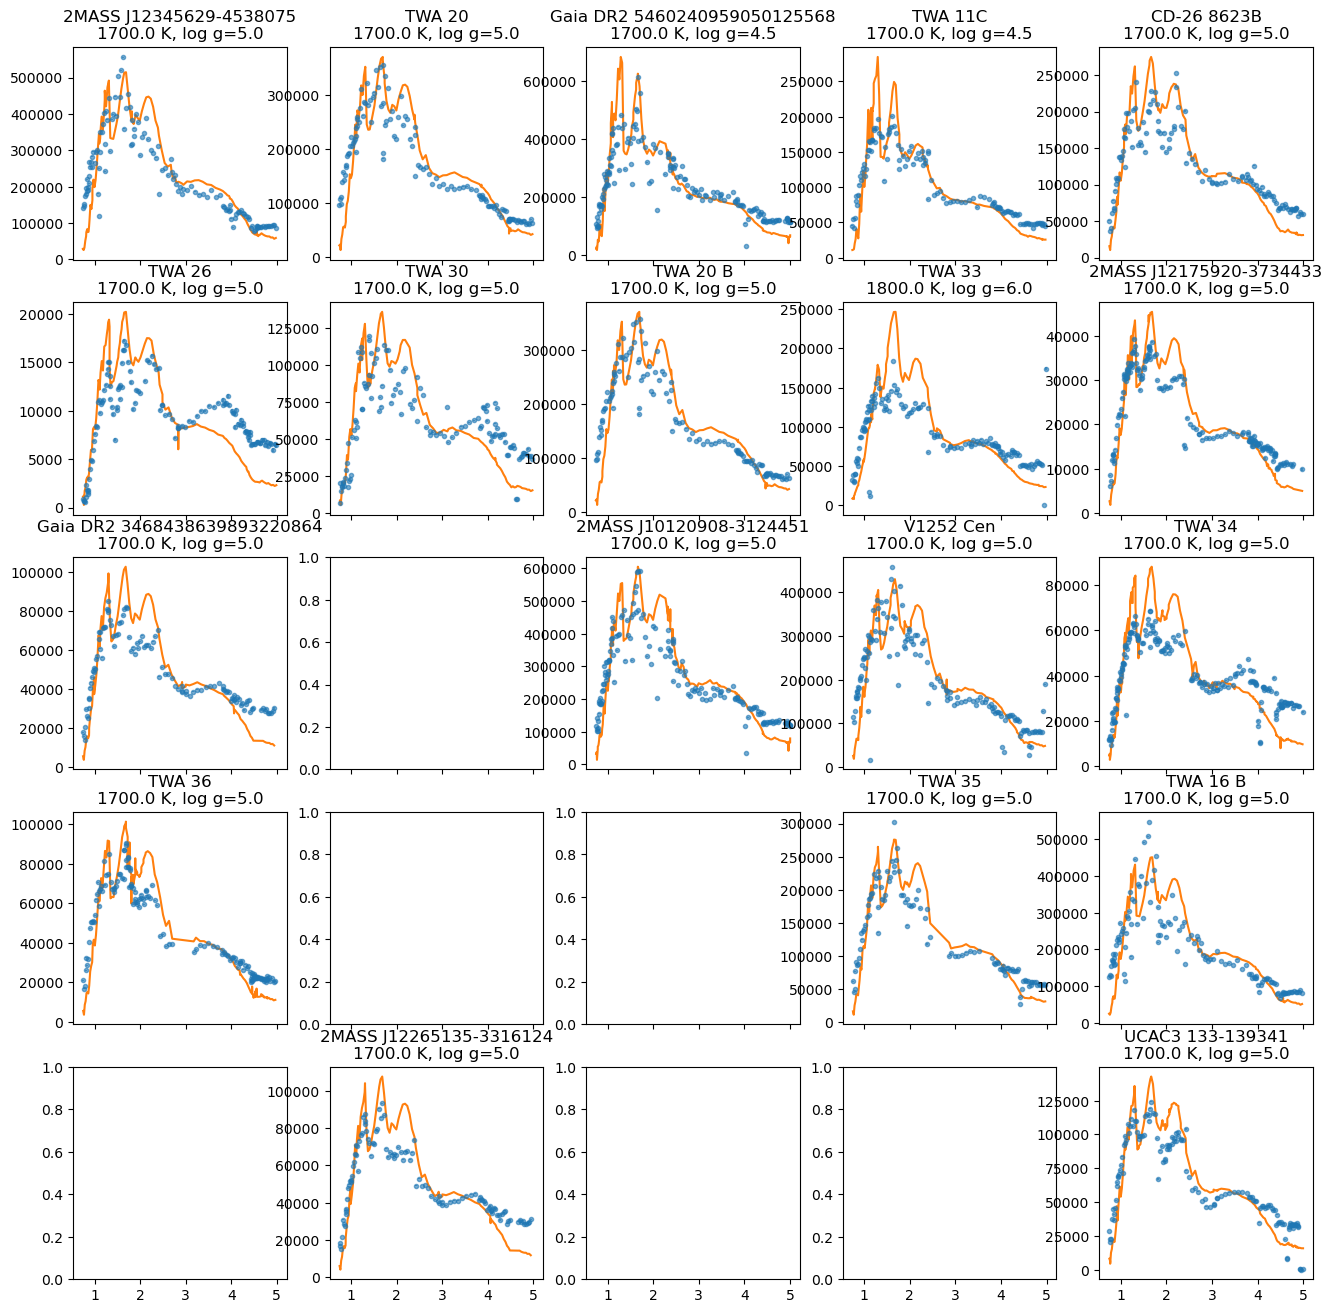

In [28]:
indices_to_plot = good_indices 

fig, axes = plt.subplots(5, 5, figsize=(16,16), sharex=True, sharey=False)
axes = axes.flatten()

for ax, i in zip(axes, indices_to_plot):

    obj = MOCA_data.iloc[i]
    designation = obj["designation"]
    obs_wave = np.fromstring(obj["wavelength"][1:-1], sep=' ')
    obs_flux = np.fromstring(obj["flux"][1:-1], sep=' ')
    obs_err  = np.fromstring(obj["flux_err"][1:-1], sep=' ')
    best = results[i]
    if  np.isnan(best["best_teff"]):
        continue

    model = [m for m in all_models if m["filename"] == best["model_filename"]][0]
    model_wave = model["wavelength"]
    model_flux = model["flux"]

    interp_flux = rebin_model_to_obs(model_wave, model_flux, obs_wave)
    a = best["scale"]
    scaled_model = a * interp_flux

    ax.errorbar(obs_wave, obs_flux, yerr=obs_err, fmt='.', alpha=0.6, label="Obs")
    ax.plot(obs_wave, scaled_model, linewidth=1.5, label="Model")

    ax.set_title(f"{designation}\n{best['best_teff']} K, log g={best['best_logg']}")


        Use Spectrum instead. [warnings]


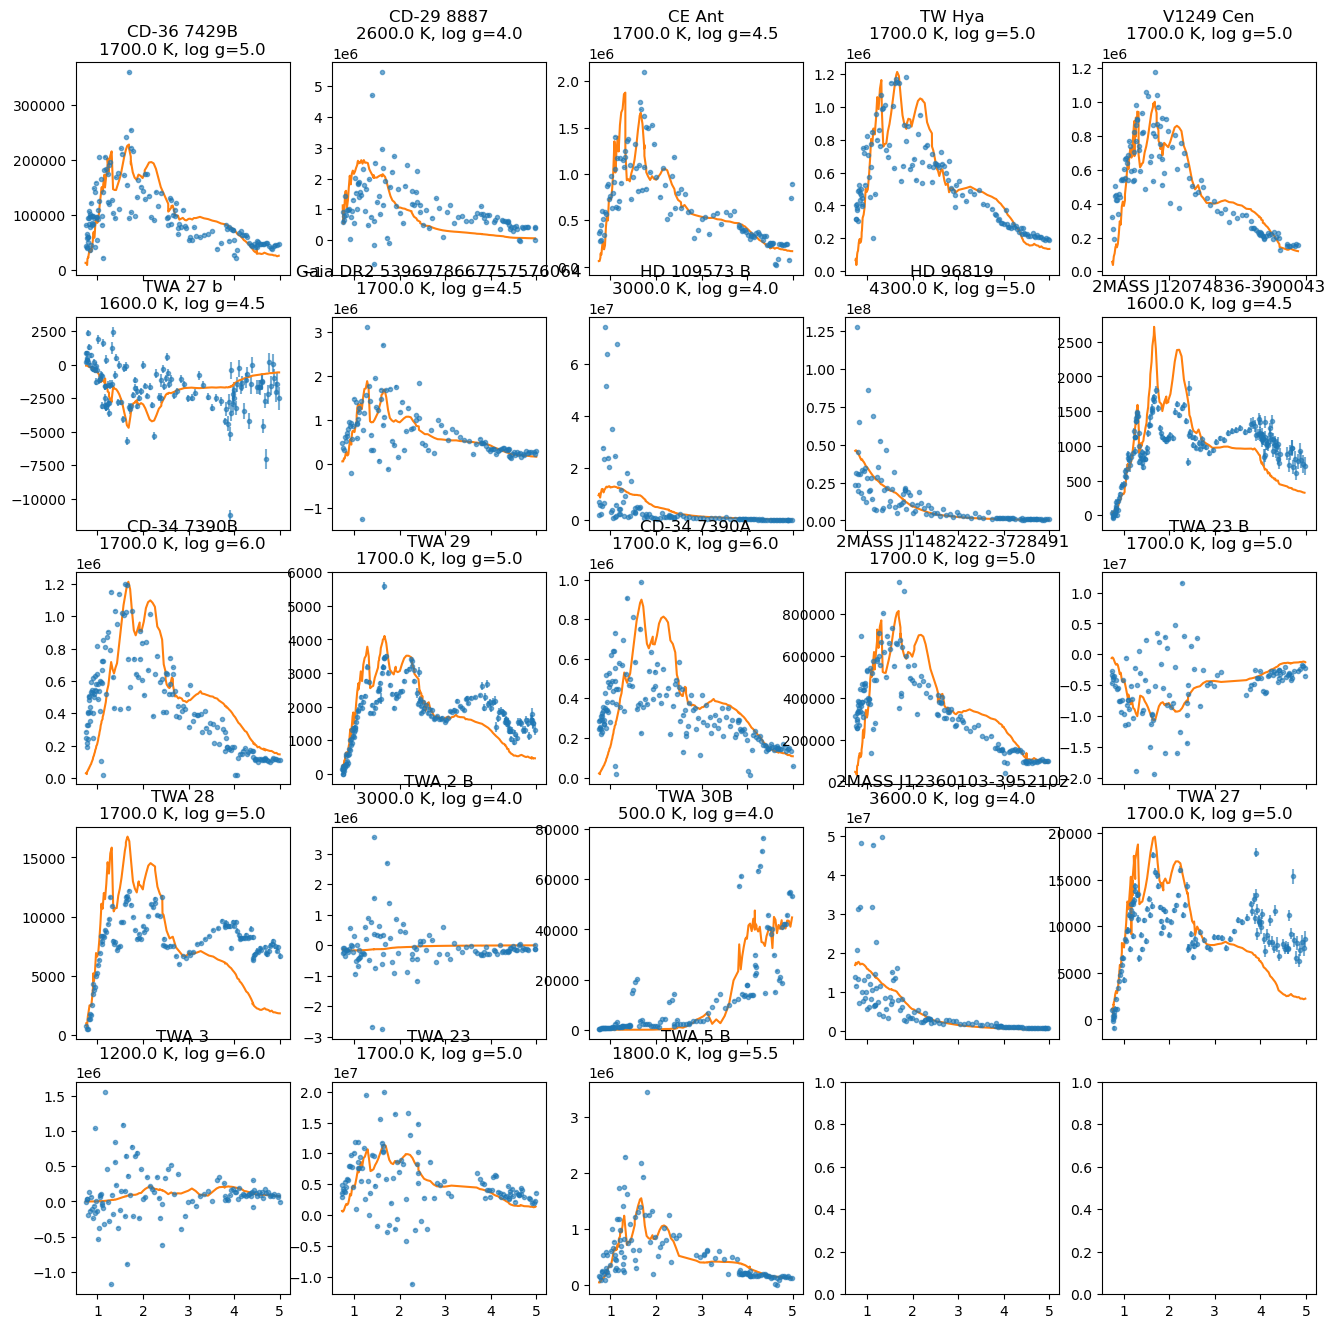

In [29]:
indices_to_plot = bad_indices 

fig, axes = plt.subplots(5, 5, figsize=(16,16), sharex=True, sharey=False)
axes = axes.flatten()

for ax, i in zip(axes, indices_to_plot):

    obj = MOCA_data.iloc[i]
    designation = obj["designation"]
    obs_wave = np.fromstring(obj["wavelength"][1:-1], sep=' ')
    obs_flux = np.fromstring(obj["flux"][1:-1], sep=' ')
    obs_err  = np.fromstring(obj["flux_err"][1:-1], sep=' ')
    best = results[i]
    if  np.isnan(best["best_teff"]):
        continue

    model = [m for m in all_models if m["filename"] == best["model_filename"]][0]
    model_wave = model["wavelength"]
    model_flux = model["flux"]

    interp_flux = rebin_model_to_obs(model_wave, model_flux, obs_wave)
    a = best["scale"]
    scaled_model = a * interp_flux

    ax.errorbar(obs_wave, obs_flux, yerr=obs_err, fmt='.', alpha=0.6, label="Obs")
    ax.plot(obs_wave, scaled_model, linewidth=1.5, label="Model")

    ax.set_title(f"{designation}\n{best['best_teff']} K, log g={best['best_logg']}")


In [38]:
MOCA_data['radius']

0     7.727836e+08
1     8.058293e+08
2     6.782379e+08
3              NaN
4     7.969939e+08
5     7.718792e+08
6     4.306383e+08
7     2.789061e+08
8     1.208431e+08
9     4.961037e+08
10    8.349096e+08
11    8.159865e+08
12             NaN
13    1.044246e+08
14    5.432721e+08
15    4.965211e+08
16    7.328504e+08
17    4.295252e+08
18    1.423820e+09
19    1.093640e+08
20    8.067337e+08
21             NaN
22    1.163906e+08
23    8.284396e+08
24    6.103376e+08
25    8.068033e+08
26    8.283700e+08
27    6.758726e+08
28    1.209127e+08
29    7.724357e+08
30    7.730618e+08
31    2.805062e+08
32    4.291773e+08
33    5.438983e+08
34    1.581048e+09
35    8.348400e+08
36    1.407401e+08
37             NaN
38    5.436896e+08
39    6.120769e+08
40             NaN
41    7.974809e+08
42    7.324330e+08
43    3.548070e+08
44             NaN
45    1.403923e+08
46    8.063163e+08
47    2.808541e+08
Name: radius, dtype: float64

In [30]:
MOCA_data['radius']**2 / (MOCA_data['distance'] * 3.086e+16)**2

0     9.362573e-20
1     1.176524e-19
2     7.508479e-20
3              NaN
4     3.160874e-19
5     5.380997e-19
6     3.838609e-20
7     3.821000e-20
8     7.028273e-21
9     1.149373e-19
10    2.024017e-19
11    2.433257e-19
12             NaN
13             NaN
14    2.247967e-19
15    1.082489e-19
16    1.128991e-19
17    3.225175e-20
18    7.139697e-19
19    2.814347e-21
20    1.909149e-19
21             NaN
22    2.101584e-21
23             NaN
24    1.417007e-19
25    1.908358e-19
26    1.231593e-19
27             NaN
28    4.373869e-21
29    1.896058e-19
30             NaN
31    2.207741e-20
32    4.939451e-20
33    1.425834e-19
34    5.240618e-19
35    3.629569e-19
36    4.972763e-21
37             NaN
38    6.199115e-20
39    2.865052e-19
40             NaN
41    2.706349e-19
42    1.744855e-19
43    3.191863e-20
44             NaN
45             NaN
46             NaN
47    4.318205e-20
dtype: float64

In [37]:
best['scale']

np.float64(0.004547598329484973)